## Preprocessing

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import joblib

In [2]:
def raise_zeros(dataFrame):
    for i in tqdm(range(len(dataFrame))):
        dataFrame.iloc[i, :] = [val if val > 0.01 else 1 for val in (dataFrame.iloc[i, :])]
        dataFrame.iloc[i, :] = [val if val < 1 else 1 for val in (dataFrame.iloc[i, :])]
        
    return dataFrame

In [3]:
left = pd.read_csv("/home/deepanshu/Downloads/left_v2.csv", header=None)
center = pd.read_csv("/home/deepanshu/Downloads/forward_v2.csv", header=None)
right = pd.read_csv("/home/deepanshu/Downloads/right_v2.csv", header=None)
env = pd.read_csv("/home/deepanshu/Downloads/env_v2.csv", header=None)

In [4]:
left = raise_zeros(left)
center = raise_zeros(center)
right = raise_zeros(right)
env = raise_zeros(env)

100%|██████████| 3101/3101 [00:06<00:00, 509.31it/s]


In [5]:
left['label'] = ([0] * len(left))
center['label'] = ([1] * len(center))
right['label'] = ([2] * len(right))
env['label'] = ([3] * len(env))

In [6]:
left.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label
0,0.341,0.337,0.335,0.334,0.334,0.335,0.337,0.340,0.344,0.348,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,0.342,0.339,0.336,0.334,0.334,0.334,0.336,0.339,0.343,0.347,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,0.343,0.339,0.336,0.334,0.334,0.334,0.336,0.339,0.343,0.346,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,0.342,0.338,0.335,0.333,0.333,0.334,0.336,0.339,0.343,0.347,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,0.341,0.338,0.335,0.334,0.334,0.335,0.336,0.339,0.343,0.347,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [7]:
center.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [8]:
right.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label
0,1.0,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.420,0.402,0.395,0.389,0.384,0.377,0.370,0.365,0.362,2
1,1.0,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.417,0.400,0.393,0.388,0.383,0.376,0.369,0.364,0.362,2
2,1.0,0.991,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.415,0.398,0.392,0.387,0.382,0.375,0.368,0.363,0.361,2
3,1.0,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.414,0.397,0.391,0.386,0.381,0.374,0.368,0.363,0.361,2
4,1.0,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.414,0.397,0.391,0.386,0.380,0.374,0.367,0.363,0.361,2


In [9]:
env.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3


In [10]:
train_set = pd.concat([left, center, right, env], axis = 0)
train_set = shuffle(train_set)
train_set.reset_index(inplace = True)
train_set.drop(['index'], axis = 1, inplace = True)

In [11]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,3
4,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11421,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,3
11422,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,...,0.692,0.687,0.688,0.688,1.0,1.0,1.0,1.0,1.0,2
11423,1.0,1.0,1.0,1.0,1.0,1.0,0.608,0.565,0.558,0.546,...,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,0
11424,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1


In [12]:
X = train_set.iloc[:, :-1].values
y = keras.utils.to_categorical(train_set.iloc[:, -1].values)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(9140, 150) (2286, 150)
(9140, 4) (2286, 4)


## Model training

In [15]:
y_test

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(units=64, input_shape=([x_train.shape[1]]), activation = 'relu'),
    keras.layers.Dense(units=4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                9664      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 9,924
Trainable params: 9,924
Non-trainable params: 0
_________________________________________________________________


In [17]:
[x_train.shape[1]]

[150]

In [18]:
save_best = keras.callbacks.ModelCheckpoint(filepath = "lidar_v2.1.h5", 
                                            monitor = "val_accuracy",
                                           mode = "max",
                                           save_best_only = True)

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks = [save_best])

Epoch 1/5
286/286 [==============================] - 2s 7ms/step - loss: 0.5452 - accuracy: 0.8719 - val_loss: 0.2486 - val_accuracy: 0.9287
Epoch 2/5
286/286 [==============================] - 1s 5ms/step - loss: 0.1732 - accuracy: 0.9663 - val_loss: 0.1231 - val_accuracy: 0.9895
Epoch 3/5
286/286 [==============================] - 1s 5ms/step - loss: 0.0940 - accuracy: 0.9849 - val_loss: 0.0731 - val_accuracy: 0.9913
Epoch 4/5
286/286 [==============================] - 1s 4ms/step - loss: 0.0601 - accuracy: 0.9904 - val_loss: 0.0483 - val_accuracy: 0.9891
Epoch 5/5
286/286 [==============================] - 1s 4ms/step - loss: 0.0430 - accuracy: 0.9928 - val_loss: 0.0350 - val_accuracy: 0.9930


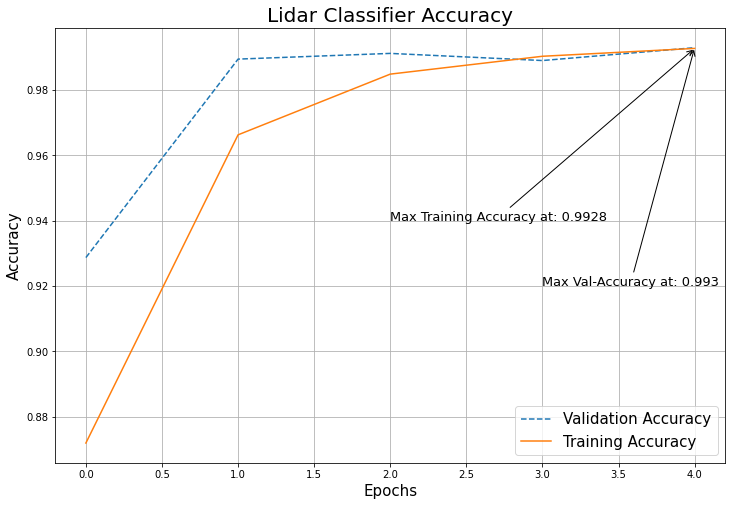

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['val_accuracy'], label = "Validation Accuracy", linestyle = '--')
plt.plot(history.epoch, history.history['accuracy'], label = "Training Accuracy")
plt.grid()
plt.annotate(f"Max Training Accuracy at: {round(max(history.history['accuracy']), 4)}", xy=(history.epoch[history.history['accuracy'].index(max(history.history['accuracy']))], max(history.history['accuracy'])), 
            xytext=(2.0, 0.94), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.annotate(f"Max Val-Accuracy at: {round(max(history.history['val_accuracy']), 4)}", xy=(history.epoch[history.history['val_accuracy'].index(max(history.history['val_accuracy']))], max(history.history['val_accuracy'])), 
            xytext=(3.0, 0.92), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.legend(fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Lidar Classifier Accuracy', fontsize=20)
plt.savefig('lidar_clf_acc.jpg')

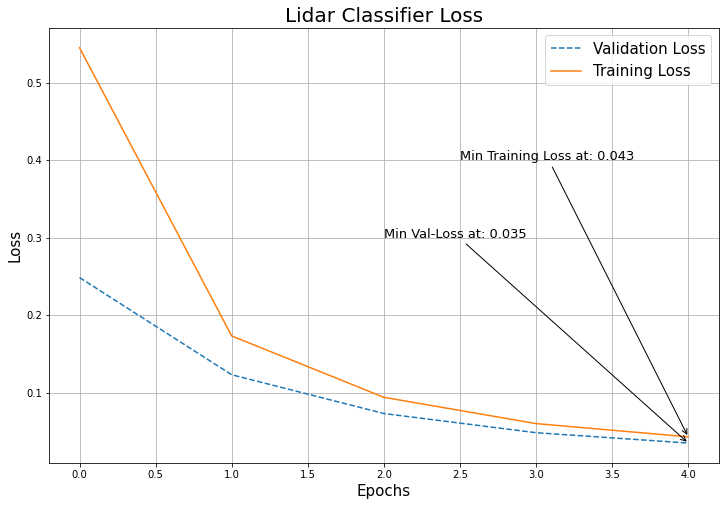

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['val_loss'], label = "Validation Loss", linestyle = '--')
plt.plot(history.epoch, history.history['loss'], label = "Training Loss")
plt.grid()
plt.annotate(f"Min Training Loss at: {round(min(history.history['loss']), 4)}", xy=(history.epoch[history.history['loss'].index(min(history.history['loss']))], min(history.history['loss'])), 
            xytext=(2.5, 0.4), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.annotate(f"Min Val-Loss at: {round(min(history.history['val_loss']), 4)}", xy=(history.epoch[history.history['val_loss'].index(min(history.history['val_loss']))], min(history.history['val_loss'])), 
            xytext=(2, 0.3), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.legend(fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Lidar Classifier Loss', fontsize=20)
plt.savefig('lidar_clf_loss.jpg')

In [19]:
np.argmax(model.predict(x_test[0:1]), axis=-1)[0]

1

In [20]:
from tensorflow.keras.models import load_model

In [21]:
m = load_model('lidar_v2.1.h5')

In [23]:
np.argmax(m.predict(x_test[0:1]), axis=-1)[0]

1

In [26]:
np.argmax(y_test[0])

1